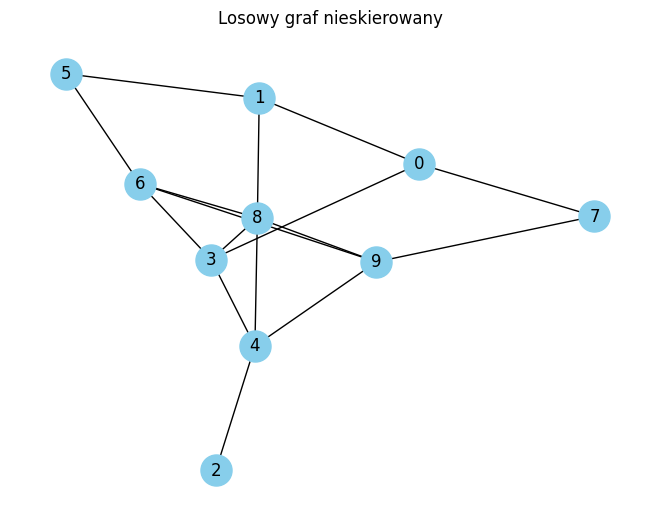

Składowe spójne grafu:
Składowa 1: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [5]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def generate_random_graph(n, p):
    """
    Funkcja generująca losowy graf nieskierowany.
    Parametry:
    - n: liczba wierzchołków
    - p: prawdopodobieństwo istnienia krawędzi między każdą parą wierzchołków
    """
    G = nx.Graph()
    for i in range(n):
        G.add_node(i)
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                G.add_edge(i, j)
    return G

def visualize_graph(G):
    """
    Funkcja wizualizująca graf.
    Parametry:
    - G: obiekt grafu z biblioteki NetworkX
    """
    pos = nx.spring_layout(G)  # pozycje wierzchołków na płaszczyźnie
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500)
    plt.title("Losowy graf nieskierowany")
    plt.show()

def find_connected_components(G):
    """
    Funkcja znajdująca składowe spójne grafu.
    Parametry:
    - G: obiekt grafu z biblioteki NetworkX
    """
    components = list(nx.connected_components(G))
    return components

# Parametry generowania grafu
n = 10  # liczba wierzchołków
p = 0.3  # prawdopodobieństwo istnienia krawędzi między każdą parą wierzchołków

# Generowanie losowego grafu
random_graph = generate_random_graph(n, p)

# Wizualizacja wygenerowanego grafu
visualize_graph(random_graph)

# Sprawdzenie składowych spójnych
components = find_connected_components(random_graph)
print("Składowe spójne grafu:")
for idx, component in enumerate(components):
    print(f"Składowa {idx + 1}: {component}")


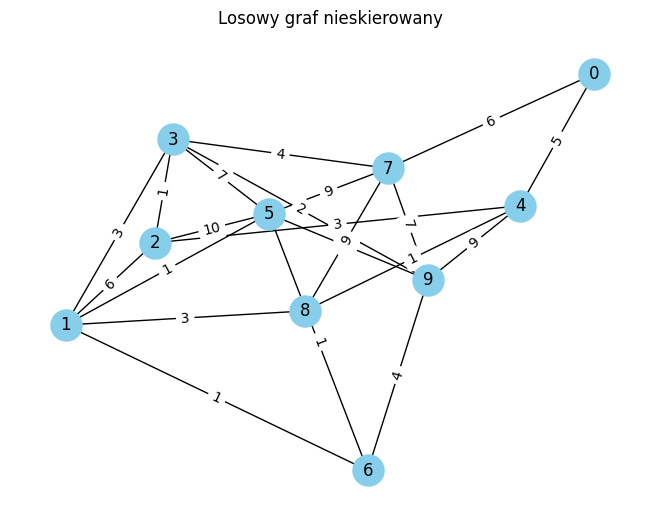

Najkrótsza ścieżka: [8, 4, 2, 3, 9]
Odległość: 7


In [9]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import heapq

def generate_random_graph(n, p):
    """
    Funkcja generująca losowy graf nieskierowany.
    Parametry:
    - n: liczba wierzchołków
    - p: prawdopodobieństwo istnienia krawędzi między każdą parą wierzchołków
    """
    G = nx.Graph()
    for i in range(n):
        G.add_node(i)
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                weight = random.randint(1, 10)  # losowanie wagi krawędzi
                G.add_edge(i, j, weight=weight)
    return G

def visualize_graph(G):
    """
    Funkcja wizualizująca graf.
    Parametry:
    - G: obiekt grafu z biblioteki NetworkX
    """
    pos = nx.spring_layout(G)  # pozycje wierzchołków na płaszczyźnie
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Losowy graf nieskierowany")
    plt.show()

def dijkstra(graph, start, end):
    """
    Funkcja implementująca algorytm Dijkstry dla wyszukiwania najkrótszej ścieżki w grafie.
    Parametry:
    - graph: obiekt grafu z biblioteki NetworkX
    - start: wierzchołek początkowy
    - end: wierzchołek końcowy
    """
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start] = 0
    prev = {node: None for node in graph.nodes()}
    visited = set()

    pq = [(0, start)]
    while pq:
        current_distance, current_node = heapq.heappop(pq)
        if current_node == end:
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = prev[current_node]
            return path[::-1], distances[end]
        if current_node in visited:
            continue
        visited.add(current_node)
        for neighbor, weight in graph[current_node].items():
            distance = distances[current_node] + weight['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                prev[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))
    return [], float('inf')

# Parametry generowania grafu
n = 10  # liczba wierzchołków
p = 0.3  # prawdopodobieństwo istnienia krawędzi między każdą parą wierzchołków

# Generowanie losowego grafu
random_graph = generate_random_graph(n, p)

# Wizualizacja wygenerowanego grafu
visualize_graph(random_graph)

# Losowe wybór wierzchołków startowego i końcowego
start = random.choice(list(random_graph.nodes()))
end = random.choice(list(random_graph.nodes()))

# Wyszukiwanie najkrótszej ścieżki algorytmem Dijkstry
path, distance = dijkstra(random_graph, start, end)

if path:
    print("Najkrótsza ścieżka:", path)
    print("Odległość:", distance)
else:
    print("Nie istnieje ścieżka między wybranymi wierzchołkami.")


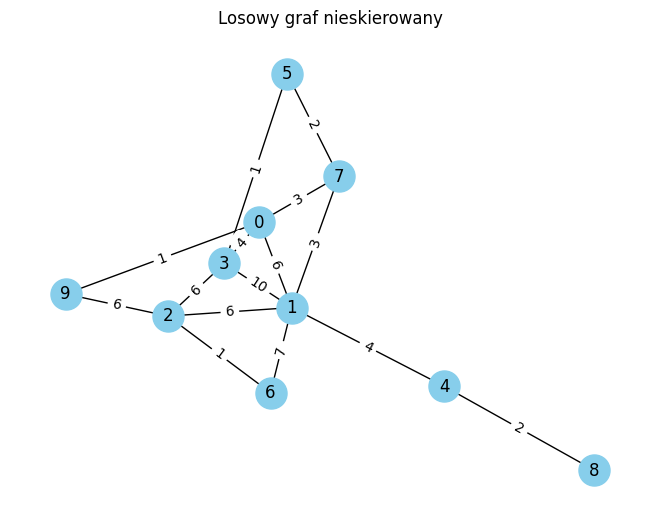

Minimalne Drzewo Rozpinające (Kruskal):
Krawędzie: [(0, 9), (0, 7), (2, 6), (2, 1), (3, 5), (5, 7), (4, 8), (4, 1), (7, 1)]
Suma wag: 23

Minimalne Drzewo Rozpinające (Prima):
Krawędzie: [(0, 0), (0, 9), (0, 7), (7, 5), (7, 1), (5, 3), (1, 4), (1, 2), (4, 8)]
Suma wag: 22


In [11]:
class DisjointSet:
    def __init__(self, n):
        self.parent = [i for i in range(n)]
        self.rank = [0] * n

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        pu, pv = self.find(u), self.find(v)
        if pu == pv:
            return False
        if self.rank[pu] < self.rank[pv]:
            self.parent[pu] = pv
        elif self.rank[pu] > self.rank[pv]:
            self.parent[pv] = pu
        else:
            self.parent[pu] = pv
            self.rank[pv] += 1
        return True

def kruskal(graph):
    edges = [(u, v, data['weight']) for u, v, data in graph.edges(data=True)]
    edges.sort(key=lambda x: x[2])
    n = len(graph.nodes())
    mst = nx.Graph()
    disjoint_set = DisjointSet(n)
    for u, v, weight in edges:
        if disjoint_set.union(u, v):
            mst.add_edge(u, v, weight=weight)
    return mst


def prim(graph):
    n = len(graph.nodes())
    mst = nx.Graph()
    visited = set()
    min_heap = [(0, 0, 0)]  # (weight, source, target)
    while min_heap and len(mst.edges()) < n - 1:
        weight, u, v = heapq.heappop(min_heap)
        if v not in visited:
            mst.add_edge(u, v, weight=weight)
            visited.add(v)
            for neighbor, data in graph[v].items():
                if neighbor not in visited:
                    heapq.heappush(min_heap, (data['weight'], v, neighbor))
    return mst


# Wygenerowanie losowego grafu
random_graph = generate_random_graph(10, 0.3)

# Wizualizacja grafu
visualize_graph(random_graph)

# Algorytm Kruskala
mst_kruskal = kruskal(random_graph)
print("Minimalne Drzewo Rozpinające (Kruskal):")
print("Krawędzie:", mst_kruskal.edges())
print("Suma wag:", sum(data['weight'] for _, _, data in mst_kruskal.edges(data=True)))

# Algorytm Prima
mst_prima = prim(random_graph)
print("\nMinimalne Drzewo Rozpinające (Prima):")
print("Krawędzie:", mst_prima.edges())
print("Suma wag:", sum(data['weight'] for _, _, data in mst_prima.edges(data=True)))
